# __Sentiment Analysis On Yelp Reviews__


## __Libraries and Dependencies__ 

In [3]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124


In [4]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd

## __Model__

In [7]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

## __Yelp Review Scraping__

In [9]:
r = requests.get('https://www.yelp.com/biz/social-brew-cafe-pyrmont')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]

In [10]:
#results 

In [11]:
r.text

'<!DOCTYPE html><html lang="en-US" prefix="og: http://ogp.me/ns#" style="margin: 0;padding: 0; border: 0; font-size: 100%; font: inherit; vertical-align: baseline;"><head><script>document.documentElement.className=document.documentElement.className.replace(/\x08no-js\x08/,"js");</script><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><meta http-equiv="Content-Language" content="en-US" /><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"><link rel="mask-icon" sizes="any" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/b2bb2fb0ec9c/assets/img/logos/yelp_burst.svg" content="#FF1A1A"><link rel="shortcut icon" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/dcfe403147fc/assets/img/logos/favicon.ico"><script> window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;window.ygaPageStartTime=new Date().getTime();</script><script>\n            window.yelp = window.yelp || {};\

In [12]:
reviews

["Very cute coffee shop and restaurant. They have a lovely outdoor seating area and several tables inside.  It was fairly busy on a Tuesday morning but we were to grab the last open table. The server was so enjoyable, she chatted and joked with us and provided fast service with our ordering, drinks and meals. The food was very good. We ordered a wide variety and every meal was good to delicious. The sweet potato fries on the Chicken Burger plate were absolutely delicious, some of the best I've ever had. I definitely enjoyed this cafe, the outdoor seating, the service and the food!!",
 "Six of us met here for breakfast before our walk to Manly. We were enjoying visiting with each other so much that I apologize for not taking any photos. We all enjoyed our food, as well as our coffee and tea drinks.We were greeted immediately by a friendly server asking if we would like to sit inside or out. We said we would like inside, but weren't exactly sure how many were joining us yet- at least 4. 

## __Load Reviews and Scoring__

In [19]:
df = pd.DataFrame(np.array(reviews), columns = ['Reviews'])

In [21]:
df.head(5)

,Reviews
0,Very cute coffee shop and restaurant. They hav...
1,Six of us met here for breakfast before our wa...
2,We came for brunch and they ran out of seven s...
3,The food was delicious. The ricotta pancakes w...
4,Great place with delicious food and friendly s...


In [23]:
df['Reviews'].iloc[2]

"We came for brunch and they ran out of seven separate menu items. We tried ordering multiple times and each time were let down with them not having what we wanted. It's understandable to not have certain things, but to have half of your menu not available is a bit ridiculous. When we finally were able to get something it was good, but we had to wait around 10-15 minutes after ordering to be told that they were out of something. Disappointing because of high expectations."

In [25]:
def sentiScore(review):
    tokens = tokenizer.encode(review, return_tensors = 'pt')
    result = model(tokens)
    sentimentScore = int(torch.argmax(result.logits))+1 #transformation
    return sentimentScore

In [27]:
df['Sentiment'] = df['Reviews'].apply(lambda x: sentiScore(x[:512])) #512 IS THE LIMIT FOR TOKENS

In [29]:
df['Sentiment']

0    4
1    4
2    2
3    4
4    5
5    5
6    5
7    4
8    5
9    3
Name: Sentiment, dtype: int64

In [31]:
df

,Reviews,Sentiment
0,Very cute coffee shop and restaurant. They hav...,4
1,Six of us met here for breakfast before our wa...,4
2,We came for brunch and they ran out of seven s...,2
3,The food was delicious. The ricotta pancakes w...,4
4,Great place with delicious food and friendly s...,5
5,Ricotta hot cakes! These were so yummy. I ate ...,5
6,Great food amazing coffee and tea. Short walk ...,5
7,We came for brunch twice in our week-long visi...,4
8,"Great service, lovely location, and really ama...",5
9,It was ok. Had coffee with my friends. I'm new...,3


In [37]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.2 kB 682.7 kB/s eta 0:00:01
   ------------ --------------------------- 92.2/301.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 2.7 MB/s eta 0:00:00


In [57]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

C:\Users\shawn\AppData\Local\Temp\ipykernel_41012\4120321537.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


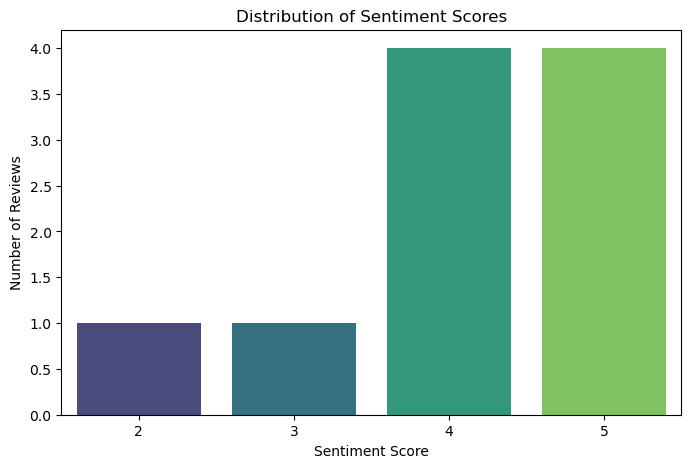

In [49]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.show()

In [51]:
sentiment_counts = df['Sentiment'].value_counts()

In [53]:
sentiment_counts

Sentiment
4    4
5    4
2    1
3    1
Name: count, dtype: int64

count      10.000000
mean      451.100000
std       360.594401
min        86.000000
25%       251.500000
50%       334.500000
75%       558.250000
max      1267.000000
Name: Review_Length, dtype: float64


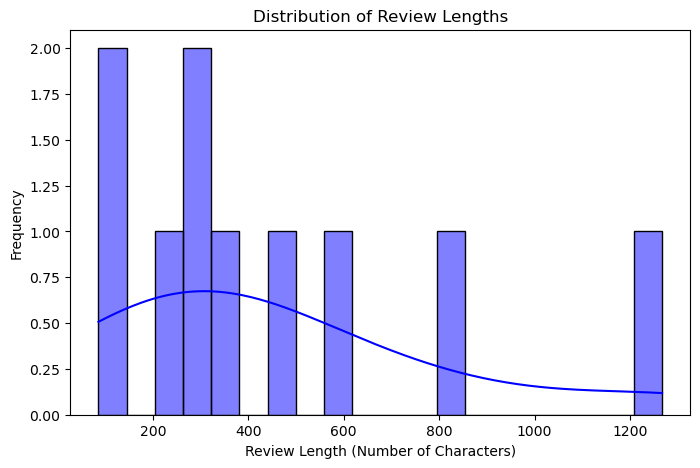

In [55]:
df['Review_Length'] = df['Reviews'].apply(len)

print(df['Review_Length'].describe())

plt.figure(figsize=(8, 5))
sns.histplot(df['Review_Length'], bins=20, kde=True, color='blue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Number of Characters)')
plt.ylabel('Frequency')
plt.show()

Most reviews have lengths clustered around 200–400 characters, indicating that shorter reviews are more common.
There are a few reviews with lengths extending beyond 800 characters, but these are much less frequent, suggesting a right-skewed distribution.
The density curve estimate (blue curve) highlights a peak in review lengths around 200–300 characters.
Implications: Shorter reviews dominate, which may indicate that users prefer to write concise feedback rather than detailed descriptions.

## __Correlation__

In [71]:
pearsonCorr, _ = pearsonr(df['Review_Length'], df['Sentiment'])
spearmanCorr, _ = spearmanr(df['Review_Length'], df['Sentiment'])

print(f"Pearson Correlation: {pearsonCorr:.2f}")
print(f"Spearman Correlation: {spearmanCorr:.2f}")

Pearson Correlation: -0.16
Spearman Correlation: -0.37


Pearson Correlation: -0.16
The Pearson correlation indicates a weak negative linear relationship between review length and sentiment score.
This suggests that as review length increases, sentiment score might slightly decrease, though the effect is very weak.
Spearman Correlation: -0.37
The Spearman correlation shows a moderate negative monotonic relationship between review length and sentiment score.
This implies that as review length increases, sentiment score tends to decrease in rank order more consistently than in a linear manner.

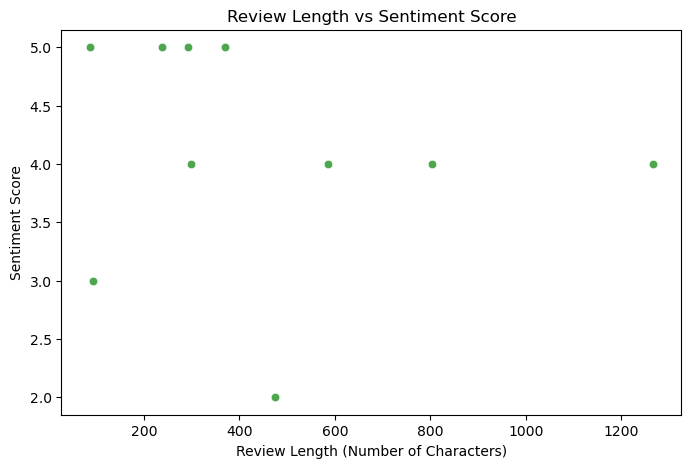

In [61]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Review_Length', y='Sentiment', data=df, alpha=0.7, color='green')
plt.title('Review Length vs Sentiment Score')
plt.xlabel('Review Length (Number of Characters)')
plt.ylabel('Sentiment Score')
plt.show()

There is no clear, consistent pattern between review length and sentiment score.
Sentiment scores of 2, 4, and 5 appear across varying review lengths, including the longest reviews (above 800 characters).
Sentiment score 3 is associated with very short reviews, consistent with its low average review length seen earlier.
Implications: Review length does not appear to predict sentiment score directly. However, longer reviews might be written for extreme scores (both high and low).

Sentiment
2    475.0
3     94.0
4    739.0
5    246.5
Name: Review_Length, dtype: float64


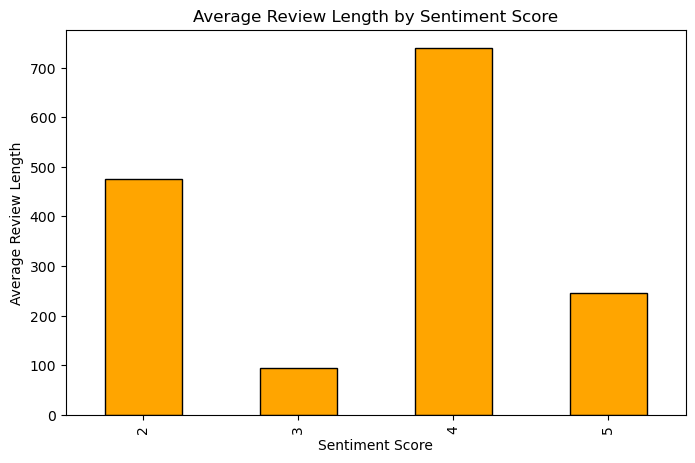

In [63]:
grouped_avg = df.groupby('Sentiment')['Review_Length'].mean()
print(grouped_avg)

plt.figure(figsize=(8, 5))
grouped_avg.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Review Length by Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Average Review Length')
plt.show()

Score 4: Reviews with a sentiment score of 4 have the longest average length, around 739 characters. This suggests that users who rate something highly but not perfectly tend to write more detailed feedback.
Score 3: Reviews with a sentiment score of 3 are the shortest, with an average length of only 94 characters. This could indicate that neutral or slightly dissatisfied users often provide minimal feedback.
Score 2: Reviews with a score of 2 have a moderate average length of 475 characters, indicating some level of detail in expressing dissatisfaction.
Score 5: Perfectly positive reviews (score 5) have a lower average length (around 246.5 characters) than sentiment score 4. This suggests that people might write concise praise when they are fully satisfied.
Score 1: No 1 star reviews in this section of data.

Possible Interpretations:
The longer average review length for sentiment 4 suggests that users feel the need to elaborate on what they liked and where minor improvements could be made.
Minimal Feedback on Neutral Reviews: Reviews with a sentiment score of 3 could mean that these users are less engaged or unsure about their experience.
The moderate length of sentiment score 2 reviews implies that users provide some detail when explaining their dissatisfaction.
Sentiment score 5 reviews are likely brief and focused on expressing overall satisfaction rather than giving detailed feedback.

## Word Cloud

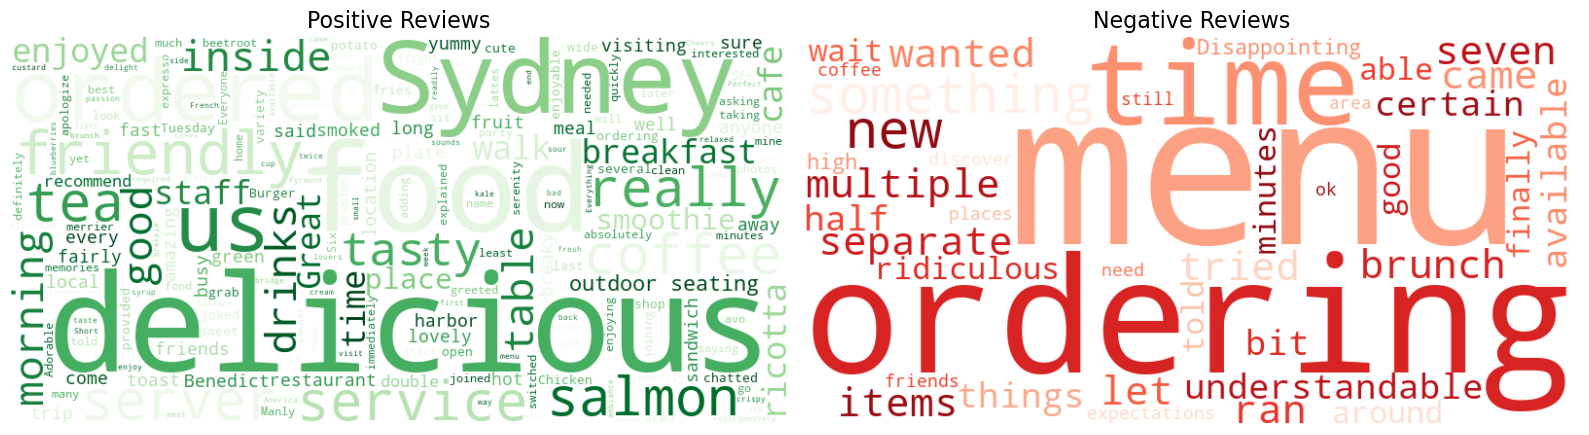

In [66]:
positive_reviews = " ".join(df[df['Sentiment'] >= 4]['Reviews'])
negative_reviews = " ".join(df[df['Sentiment'] <= 3]['Reviews'])

positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_reviews)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(positive_wordcloud, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Positive Reviews', fontsize=16)

axes[1].imshow(negative_wordcloud, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Negative Reviews', fontsize=16)

plt.tight_layout()
plt.show()

The word cloud visualizes terms commonly found in both positive and negative reviews.
In the positive reviews (left), words like "delicious," "Sydney," and "tasty" appear more frequently. Which can reflect frequent mentions of enjoyable experiences.
Conversely, in the negative reviews (right), terms such as "ordering," "menu," and "time" stand out, highlighting recurring issues.
The size and color intensity of each word correspond to its frequency, with larger and darker words indicating higher usage.